In [1]:
!pip uninstall -y tensorflow


Found existing installation: tensorflow 2.6.4
Uninstalling tensorflow-2.6.4:
  Successfully uninstalled tensorflow-2.6.4


In [2]:
!pip install tensorflow==1.13.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 11.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 60.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.6/367.6 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
tfx-bsl 1.9.0 re

In [3]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if "GPU" not in device_name:
    print("GPU device not found")
print('Found GPU at: {}'.format(device_name))

/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

GPU device not found
Found GPU at: 


2023-01-31 19:03:24.924804: I tensorflow/core/platform/cpu_feature_guard.cc:141] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 AVX512F FMA
2023-01-31 19:03:24.938790: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2000245000 Hz
2023-01-31 19:03:24.939061: I tensorflow/compiler/xla/service/service.cc:150] XLA service 0x55e8a906d0b0 executing computations on platform Host. Devices:
2023-01-31 19:03:24.939095: I tensorflow/compiler/xla/service/service.cc:158]   StreamExecutor device (0): <undefined>, <undefined>


### Install All Dependencies 

In [42]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

# Import the necessary libraries
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import ReLU
from sklearn.model_selection import train_test_split

datasets = tf.contrib.keras.datasets
layers =  tf.contrib.keras.layers
models = tf.contrib.keras.models
losses = tf.contrib.keras.losses
optimizers = tf.contrib.keras.optimizers 
metrics = tf.contrib.keras.metrics
preprocessing_image = tf.contrib.keras.preprocessing.image
utils = tf.contrib.keras.utils
callbacks = tf.contrib.keras.callbacks

### Writing Model Architecture for SqueezeNet

In [45]:
from tensorflow.keras.utils import plot_model

In [28]:
## Model Architecture of SqueezeNet

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Activation, ReLU
from tensorflow.keras.layers import Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.layers import concatenate

# Fire Module
def fire_module(x,s1,e1,e3):

    #x --> layer
    #s1 --> squeeze dimension
    #e1 --> expanding for 1x1 layer
    #e3 --> expanding for 3x3 layers

    # Squeezing Layer
    s1x = Conv2D(s1,kernel_size = 1, padding='same')(x)
    s1x = ReLU()(s1x)

    #1x1 expand Layer
    e1x = Conv2D(e1,kernel_size = 1, padding='same')(s1x)

    #3x3 expand Layer
    e3x = Conv2D(e3,kernel_size = 3, padding='same')(s1x)

    #Combining and Passing through ReLU Layer
    x = concatenate([e1x,e3x])
    x = ReLU()(x)

    return x

# SqueezeNet Layer
def SqueezeNet(input_shape, nclasses):

    input = Input(input_shape)

    # 1st Convolution
    x = Conv2D(96,kernel_size = (7,7), 
                strides = (2,2),padding='same',input_shape = input_shape)(input)

    # 1st MaxPooling
    x = MaxPool2D((3,3),strides = (2,2),padding='same')(x)

    # FireModule1
    x = fire_module(x,s1 =16,e1=64,e3 = 64)

    # FireModule2
    x = fire_module(x,s1 =16,e1=64,e3 = 64)

    # FireModule3
    x = fire_module(x,s1=32,e1=128,e3=128)

    # 2nd MaxPooling
    x = MaxPool2D((3,3),strides = (2,2),padding='same')(x)

    # FireModule4
    x = fire_module(x,s1 = 32,e1=128,e3=128)

    # FireModule5
    x = fire_module(x,s1 =48,e1=192,e3 =192)

    # FireModule6
    x = fire_module(x,s1 =48,e1=192,e3 =192)

    # FireModule7
    x = fire_module(x,s1 =64,e1=256,e3 =256)
        
    # 3rd MaxPooling
    x = MaxPool2D((3,3),strides = (2,2),padding='same')(x)

    # FireModule8
    x = fire_module(x,s1=64,e1=256,e3=256)

    # 2nd Convolution
    x = Dropout(0.5)(x)

    # For Classes - here 5 
    x = layers.Convolution2D(5, (1, 1), padding='valid', name='conv10')(x)

    x = layers.Activation('relu', name='relu_conv10')(x)

    x = layers.GlobalAveragePooling2D()(x)

    out = layers.Activation('softmax', name='loss')(x)

    model = models.Model(input, out, name='squeezenet')
    
    return model


### Separating Training and Test Data

In [29]:
import os

import cv2

X = []
y = []

#Using soil data
base_dir = '/kaggle/input/squeezenet/squeezenet/data/'
for f in sorted(os.listdir(base_dir)):
    if os.path.isdir(base_dir+f):

        for i in sorted(os.listdir(base_dir+f)):
            X.append(base_dir+f+'/'+i)
            y.append(f)

            
# Perform training test split with test size = 20%
(trainX, testX, trainY, testY) = train_test_split(X,y, test_size=0.20,random_state=42)

### Perform Data Augmentation and Necessary Preprocessing

In [30]:
# Prepare the data 
trainX_list = []
for imagePath in trainX:
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    trainX_list.append(image)

testX_list = []
for imagePath in testX:
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    testX_list.append(image)

trainY_array = np.unique(trainY, return_inverse=True)[1]
trainY_array = trainY_array.reshape(len(trainY_array),1)

testY_array = np.unique(testY, return_inverse=True)[1]
testY_array = testY_array.reshape(len(testY_array),1)

trainX_list_array = np.asarray(trainX_list)
testX_list_array  = np.asarray(testX_list)

# Apply preprocessing methods
train_datagen = preprocessing_image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = preprocessing_image.ImageDataGenerator(rescale=1./255)

trainY_array = utils.to_categorical(trainY_array, num_classes=5)
testY_array = utils.to_categorical(testY_array, num_classes=5)

# Finalize the data to be put in our neural network models
train_generator = train_datagen.flow(x=trainX_list_array, y=trainY_array, batch_size=5, shuffle=True)

test_generator = test_datagen.flow(x=testX_list_array, y=testY_array, batch_size=5, shuffle=True)

### Compiling SqueezeNet Model With Given Parameters

In [34]:
def compile_model(model):

    # loss
    loss = losses.categorical_crossentropy

    # optimizer
    optimizer = optimizers.Adam(lr=0.0001)

    # compile model with loss, optimizer, and evaluation metrics
    model.compile(optimizer, loss, metrics=['accuracy'])

    return model

In [35]:
input_shape = (224,224,3)
classes = 5

# Compiling the model 
sn = SqueezeNet(input_shape = input_shape, nclasses = 5)
sn = compile_model(sn)

In [47]:
plot_model(sn, to_file='/kaggle/working/squeezenet_model_plot.png', show_shapes=True, show_layer_names=True)

### SqueezeNet Training

In [36]:
# Train for 100 epochs
history = sn.fit(
    train_generator,
    epochs=100,
    steps_per_epoch = 200,
    validation_steps = 200,
    validation_data=test_generator,
    shuffle = True)

Epoch 1/100
25/25 [==============================] - 30s 1s/step - loss: 1.6096 - acc: 0.1532 - val_loss: 1.6094 - val_acc: 0.2812
Epoch 2/100
25/25 [==============================] - 29s 1s/step - loss: 1.6094 - acc: 0.2581 - val_loss: 1.6094 - val_acc: 0.3438
Epoch 3/100
25/25 [==============================] - 29s 1s/step - loss: 1.6095 - acc: 0.2016 - val_loss: 1.6089 - val_acc: 0.3438
Epoch 4/100
25/25 [==============================] - 29s 1s/step - loss: 1.6020 - acc: 0.2339 - val_loss: 1.5835 - val_acc: 0.3125
Epoch 5/100
25/25 [==============================] - 29s 1s/step - loss: 1.4740 - acc: 0.3790 - val_loss: 1.4791 - val_acc: 0.3438
Epoch 6/100
25/25 [==============================] - 29s 1s/step - loss: 1.4107 - acc: 0.4032 - val_loss: 1.2919 - val_acc: 0.4375
Epoch 7/100
25/25 [==============================] - 28s 1s/step - loss: 1.3300 - acc: 0.3952 - val_loss: 1.3264 - val_acc: 0.4062
Epoch 8/100
25/25 [==============================] - 29s 1s/step - loss: 1.1938 - a

### Saving The Model

In [39]:
sn.save('squeeze_model.h5')

In [38]:
import pandas as pd
hist_json_file = 'squeezenet.json' 
hist_df = pd.DataFrame(history.history) 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

### Plotting the Losses and Accuracies

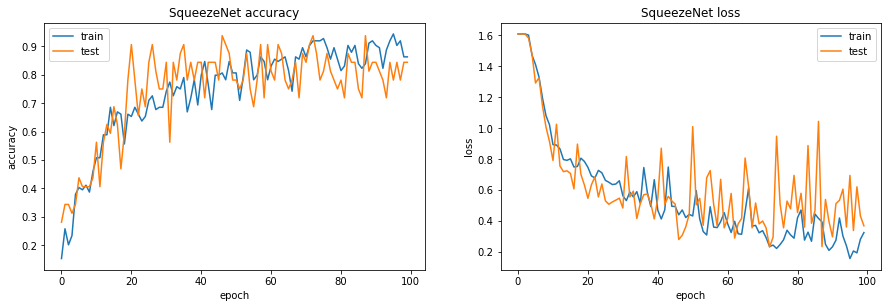

In [37]:
def plot_accuracy_and_loss(history):
    plt.figure(1, figsize= (15, 10))

    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('SqueezeNet accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('SqueezeNet loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()
    
plot_accuracy_and_loss(history)

### AlexNet Training

In [49]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np

# AlexNet 
def AlexNet(input_shape):
    
    # Giving input_shape
    X_input = Input(input_shape)
    
    # First set of Convolution Block
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "batchnorm0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    # Second set of Convolution Block
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='batchnorm1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    # Third set of Convolution Block
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'batchnorm2')(X)
    X = Activation('relu')(X)
    
    # Fourth set of Convolution Block
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'batchnorm3')(X)
    X = Activation('relu')(X)
    
    # Fifth set of Convolution Block
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'batchnorm4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    # For specifying classes - here, 5
    X = Dense(5,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
    return model

alex = AlexNet(input_shape = (224,224,3))

In [50]:
plot_model(alex, to_file='/kaggle/working/alexnet_model_plot.png', show_shapes=True, show_layer_names=True)

In [22]:

opt = optimizers.SGD(lr=0.01)
alex.compile(loss=losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

In [23]:
history_2 = alex.fit(
    train_generator,
    epochs=100,
    validation_data=test_generator)

Epoch 1/100
25/25 [==============================] - 39s 2s/step - loss: 4.9675 - acc: 0.3306 - val_loss: 4.6217 - val_acc: 0.0938
Epoch 2/100
25/25 [==============================] - 38s 2s/step - loss: 2.6977 - acc: 0.4597 - val_loss: 3.1912 - val_acc: 0.3125
Epoch 3/100
25/25 [==============================] - 38s 2s/step - loss: 1.3209 - acc: 0.5484 - val_loss: 1.4033 - val_acc: 0.5000
Epoch 4/100
25/25 [==============================] - 38s 2s/step - loss: 1.0874 - acc: 0.5968 - val_loss: 1.3017 - val_acc: 0.4688
Epoch 5/100
25/25 [==============================] - 39s 2s/step - loss: 1.0904 - acc: 0.5403 - val_loss: 1.2460 - val_acc: 0.4062
Epoch 6/100
25/25 [==============================] - 38s 2s/step - loss: 0.9467 - acc: 0.6613 - val_loss: 1.3614 - val_acc: 0.3438
Epoch 7/100
25/25 [==============================] - 38s 2s/step - loss: 0.9469 - acc: 0.6452 - val_loss: 1.2238 - val_acc: 0.3750
Epoch 8/100
25/25 [==============================] - 38s 2s/step - loss: 0.6911 - a

In [30]:
import pandas as pd
hist_json_file = 'history.json' 
hist_df = pd.DataFrame(history_2.history) 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

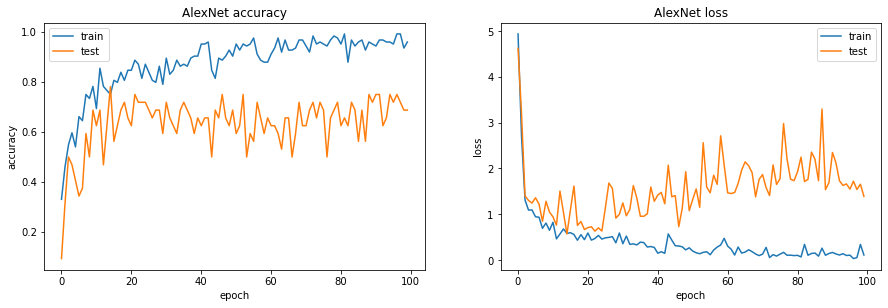

In [35]:
def plot_accuracy_and_loss(history):
    plt.figure(1, figsize= (15, 10))

    # plot train and test accuracy
    plt.subplot(221)
    plt.plot(history_2.history['acc'])
    plt.plot(history_2.history['val_acc'])
    plt.title('AlexNet accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    # plot train and test loss
    plt.subplot(222)
    plt.plot(history_2.history['loss'])
    plt.plot(history_2.history['val_loss'])
    plt.title('AlexNet loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')

    plt.show()
    
plot_accuracy_and_loss(history_2)

In [28]:
alex.save('/kaggle/working/alex_model.h5')